In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

### 数据加载、基本操作

In [3]:
# 读取 iris.csv 文件
iris_data = pd.read_csv("iris.csv")

In [54]:
# 展示若干行数据
iris_data.head()

,Unnamed: 0,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,1,5.1,3.5,1.4,0.2,setosa
1,2,4.9,3.0,1.4,0.2,setosa
2,3,4.7,3.2,1.3,0.2,setosa
3,4,4.6,3.1,1.5,0.2,setosa
4,5,5.0,3.6,1.4,0.2,setosa


In [5]:
# 查看数据的常用统计量
iris_data.describe()

,Unnamed: 0,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.057333,3.758000,1.199333
std,43.445368,0.828066,0.435866,1.765298,0.762238
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [55]:
# 查看列索引名字
iris_data.columns

Index(['Unnamed: 0', 'Sepal.Length', 'Sepal.Width', 'Petal.Length',
       'Petal.Width', 'Species'],
      dtype='object')

### 练习，去掉 'Unnamed: 0' 这一列

In [58]:
iris_data = iris_data.drop(?)

In [5]:
iris_data.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [6]:
# 替换列索引
iris_data.columns = ([u'花萼长度', u'花萼宽度', u'花瓣长度', u'花瓣宽度', u'种类'])

In [7]:
# 查看末尾若干行数据
iris_data.tail()

,花萼长度,花萼宽度,花瓣长度,花瓣宽度,种类
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [62]:
# 查看各列的中位数
iris_data.median(0)

花萼长度    5.80
花萼宽度    3.00
花瓣长度    4.35
花瓣宽度    1.30
dtype: float64

In [63]:
# 查看数据的平均绝对偏差
iris_data.mad()

花萼长度    0.687556
花萼宽度    0.336782
花瓣长度    1.562747
花瓣宽度    0.658133
dtype: float64

In [64]:
# 查看数据缺失情况
iris_data.isnull().sum()

花萼长度    0
花萼宽度    0
花瓣长度    0
花瓣宽度    0
种类      0
dtype: int64

In [65]:
iris_data.mean(axis='index')

花萼长度    5.843333
花萼宽度    3.057333
花瓣长度    3.758000
花瓣宽度    1.199333
dtype: float64

## 分组、聚合

DataFrameGroupBy 相当于是 DataFrame 数据的一个视图，并不占用实际内存

In [66]:
gb = iris_data.groupby('种类')
gb

In [67]:
gb.sum()

,花萼长度,花萼宽度,花瓣长度,花瓣宽度
种类,,,,
setosa,250.3,171.4,73.1,12.3
versicolor,296.8,138.5,213.0,66.3
virginica,329.4,148.7,277.6,101.3


In [68]:
gb['花萼长度']

In [69]:
gb['花萼长度'].median()

种类
setosa        5.0
versicolor    5.9
virginica     6.5
Name: 花萼长度, dtype: float64

In [70]:
# 查看各个分类的数据量
for (classes, group) in iris_data.groupby('种类'):
    print("class={0:16s} shape={1}".format(classes, group.shape))

class=setosa           shape=(50, 5)
class=versicolor       shape=(50, 5)
class=virginica        shape=(50, 5)


In [71]:
# 查看各个分类的数据
for (classes, group) in iris_data.groupby('种类'):
    print("group={0}".format(group))

group=    花萼长度  花萼宽度  花瓣长度  花瓣宽度      种类
0    5.1   3.5   1.4   0.2  setosa
1    4.9   3.0   1.4   0.2  setosa
2    4.7   3.2   1.3   0.2  setosa
3    4.6   3.1   1.5   0.2  setosa
4    5.0   3.6   1.4   0.2  setosa
5    5.4   3.9   1.7   0.4  setosa
6    4.6   3.4   1.4   0.3  setosa
7    5.0   3.4   1.5   0.2  setosa
8    4.4   2.9   1.4   0.2  setosa
9    4.9   3.1   1.5   0.1  setosa
10   5.4   3.7   1.5   0.2  setosa
11   4.8   3.4   1.6   0.2  setosa
12   4.8   3.0   1.4   0.1  setosa
13   4.3   3.0   1.1   0.1  setosa
14   5.8   4.0   1.2   0.2  setosa
15   5.7   4.4   1.5   0.4  setosa
16   5.4   3.9   1.3   0.4  setosa
17   5.1   3.5   1.4   0.3  setosa
18   5.7   3.8   1.7   0.3  setosa
19   5.1   3.8   1.5   0.3  setosa
20   5.4   3.4   1.7   0.2  setosa
21   5.1   3.7   1.5   0.4  setosa
22   4.6   3.6   1.0   0.2  setosa
23   5.1   3.3   1.7   0.5  setosa
24   4.8   3.4   1.9   0.2  setosa
25   5.0   3.0   1.6   0.2  setosa
26   5.0   3.4   1.6   0.4  setosa
27   5.2   3.5

### Aggregation，Filtering，Transformation 以及 apply() 方法

In [72]:
# 查看各个分类的最小值、中位数、最大值
iris_data.groupby('种类').aggregate(['min', np.median, max])

花萼长度             花萼宽度             花瓣长度             花瓣宽度            
            min median  max  min median  max  min median  max  min median  max
种类                                                                            
setosa      4.3    5.0  5.8  2.3    3.4  4.4  1.0   1.50  1.9  0.1    0.2  0.6
versicolor  4.9    5.9  7.0  2.0    2.8  3.4  3.0   4.35  5.1  1.0    1.3  1.8
virginica   4.9    6.5  7.9  2.2    3.0  3.8  4.5   5.55  6.9  1.4    2.0  2.5

In [73]:
iris_data.groupby('种类').aggregate({'花萼长度': [np.std, 'min','max'], '花瓣长度': [np.std, np.median, 'max']})

花萼长度                花瓣长度            
                 std  min  max       std median  max
种类                                                  
setosa      0.352490  4.3  5.8  0.173664   1.50  1.9
versicolor  0.516171  4.9  7.0  0.469911   4.35  5.1
virginica   0.635880  4.9  7.9  0.551895   5.55  6.9

In [74]:
def filter_func(x):
    return x['花萼长度'].std() > 0.5 and x['花瓣长度'].std() > 0.5

In [75]:
iris_data.groupby('种类')['花萼长度','花萼宽度','花瓣长度','花瓣宽度'].std()

,花萼长度,花萼宽度,花瓣长度,花瓣宽度
种类,,,,
setosa,0.352490,0.379064,0.173664,0.105386
versicolor,0.516171,0.313798,0.469911,0.197753
virginica,0.635880,0.322497,0.551895,0.274650


In [76]:
# 查看 花萼长度的标准差 > 0.5 以及花瓣长度的标准差 > 0.5 的分类数据
iris_data.groupby('种类').filter(filter_func)

,花萼长度,花萼宽度,花瓣长度,花瓣宽度,种类
100,6.3,3.3,6.0,2.5,virginica
101,5.8,2.7,5.1,1.9,virginica
102,7.1,3.0,5.9,2.1,virginica
103,6.3,2.9,5.6,1.8,virginica
104,6.5,3.0,5.8,2.2,virginica
105,7.6,3.0,6.6,2.1,virginica
106,4.9,2.5,4.5,1.7,virginica
107,7.3,2.9,6.3,1.8,virginica
108,6.7,2.5,5.8,1.8,virginica
109,7.2,3.6,6.1,2.5,virginica


In [77]:
# 按分类对数据作标准化处理
iris_data_std = iris_data.groupby('种类').transform(lambda x: (x - x.mean())/x.std())
iris_data_std

,花萼长度,花萼宽度,花瓣长度,花瓣宽度
0,0.266674,0.189941,-0.357011,-0.436492
1,-0.300718,-1.129096,-0.357011,-0.436492
2,-0.868111,-0.601481,-0.932836,-0.436492
3,-1.151807,-0.865288,0.218813,-0.436492
4,-0.017022,0.453749,-0.357011,-0.436492
5,1.117763,1.245171,1.370463,1.461300
6,-1.151807,-0.073866,-0.357011,0.512404
7,-0.017022,-0.073866,0.218813,-0.436492
8,-1.719199,-1.392903,-0.357011,-0.436492
9,-0.300718,-0.865288,0.218813,-1.385389


### 练习，按 '花萼长度' 降序排列

In [80]:
iris_data_std.sort_values(?)

,花萼长度,花萼宽度,花瓣长度,花瓣宽度
14,2.252548,1.508979,-1.508660,-0.436492
131,2.063284,2.561267,1.536525,-0.094666
50,2.061332,1.370307,0.936348,0.374205
18,1.968852,0.981364,1.370463,0.512404
15,1.968852,2.564208,0.218813,1.461300
52,1.867598,1.051631,1.361960,0.879887
117,1.748759,2.561267,2.080107,0.633533
122,1.748759,-0.539541,2.080107,-0.094666
118,1.748759,-1.159702,2.442495,0.997633
135,1.748759,0.080621,0.992943,0.997633


## 初步绘制

/home/ubuntu/anaconda2/envs/pytorch30/lib/python3.7/site-packages/pandas/plotting/_core.py:2254: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  return_type=return_type, **kwds)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f152b87ec90>,
      dtype=object)

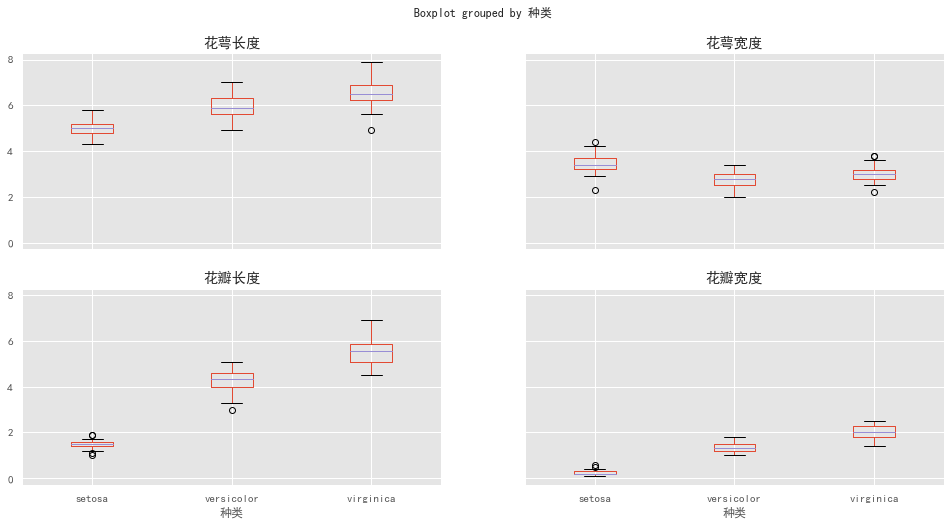

In [81]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

fig, ax = plt.subplots(figsize=(16, 8))
iris_data.boxplot(column=['花萼长度','花萼宽度','花瓣长度','花瓣宽度'], by='种类', ax=ax)

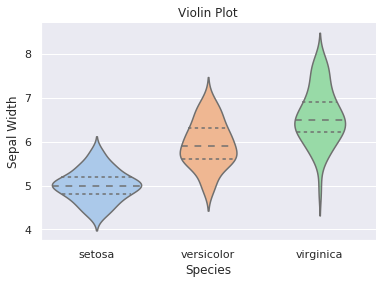

In [8]:
import seaborn as sns
sns.set(font='SimHei')

sns.set(style="darkgrid", palette="pastel", color_codes=True)

ax = sns.violinplot(x='种类', y='花萼长度', data=iris_data, split=True, inner="quart")

ax.set_title('Violin Plot')
ax.set_xlabel('Species')
ax.set_ylabel('Sepal Width')
sns.despine( offset = 0 )

## 练习

#### transform()  计算

- 会将计算结果按照原始数据的排序组装成一个 DataFrame 对象

In [83]:
tf_mean = iris_data.groupby('种类').transform(np.mean).add_prefix('mean_')
tf_mean.columns 

Index(['mean_花萼长度', 'mean_花萼宽度', 'mean_花瓣长度', 'mean_花瓣宽度'], dtype='object')

In [84]:
tf_mean

,mean_花萼长度,mean_花萼宽度,mean_花瓣长度,mean_花瓣宽度
0,5.006,3.428,1.462,0.246
1,5.006,3.428,1.462,0.246
2,5.006,3.428,1.462,0.246
3,5.006,3.428,1.462,0.246
4,5.006,3.428,1.462,0.246
5,5.006,3.428,1.462,0.246
6,5.006,3.428,1.462,0.246
7,5.006,3.428,1.462,0.246
8,5.006,3.428,1.462,0.246
9,5.006,3.428,1.462,0.246


In [85]:
# 把运算结果数据拼接到原始数据后
iris_data[?] = tf_mean

In [86]:
iris_data

,花萼长度,花萼宽度,花瓣长度,花瓣宽度,种类,mean_花萼长度,mean_花萼宽度,mean_花瓣长度,mean_花瓣宽度
0,5.1,3.5,1.4,0.2,setosa,5.006,3.428,1.462,0.246
1,4.9,3.0,1.4,0.2,setosa,5.006,3.428,1.462,0.246
2,4.7,3.2,1.3,0.2,setosa,5.006,3.428,1.462,0.246
3,4.6,3.1,1.5,0.2,setosa,5.006,3.428,1.462,0.246
4,5.0,3.6,1.4,0.2,setosa,5.006,3.428,1.462,0.246
5,5.4,3.9,1.7,0.4,setosa,5.006,3.428,1.462,0.246
6,4.6,3.4,1.4,0.3,setosa,5.006,3.428,1.462,0.246
7,5.0,3.4,1.5,0.2,setosa,5.006,3.428,1.462,0.246
8,4.4,2.9,1.4,0.2,setosa,5.006,3.428,1.462,0.246
9,4.9,3.1,1.5,0.1,setosa,5.006,3.428,1.462,0.246
